Chapter 15

# 多元随机数
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码展示了如何生成与给定数据集（Iris数据集）具有相同均值和协方差的多元正态分布随机样本，并可视化生成的样本在二维特征空间中的分布。

1. **计算均值和协方差**：
   - 从Iris数据集中提取特征矩阵 $X$，并计算每个特征的均值向量 $\mu$ 和协方差矩阵 $\Sigma$。这里，均值 $\mu$ 是一个 $4 \times 1$ 的向量，协方差矩阵 $\Sigma$ 是一个 $4 \times 4$ 的矩阵，代表特征之间的线性关系。

2. **生成多元正态分布样本**：
   - 使用 $\mu$ 和 $\Sigma$ 初始化一个多元正态分布 `multi_norm`，并从该分布生成 $200$ 个随机样本，存入 $X_{\text{rand}}$。
   - 生成的样本会服从 $\mathcal{N}(\mu, \Sigma)$，即与Iris数据集的均值和协方差一致的多元正态分布。

3. **可视化**：
   - 使用Seaborn的 `pairplot` 函数对生成的样本进行可视化。在对角线上显示每个特征的直方图，其他子图则展示了特征之间的二维分布，其中上三角显示散点图，下三角显示核密度估计（KDE）的等高线图。这种展示方式可以直观地观察特征间的相关性和分布特征。

In [1]:
import numpy as np  # 导入数值计算库numpy
import matplotlib.pyplot as plt  # 导入绘图库matplotlib
import pandas as pd  # 导入数据处理库pandas
from sklearn.datasets import load_iris  # 导入sklearn的鸢尾花数据集
from scipy.stats import norm  # 导入正态分布
import scipy  # 导入科学计算库scipy
import seaborn as sns  # 导入绘图库seaborn
from scipy.stats import multivariate_normal  # 导入多变量正态分布

## 加载鸢尾花数据集

In [2]:
iris = load_iris()  # 加载鸢尾花数据集
X = iris.data  # 提取数据特征矩阵
y = iris.target  # 提取数据标签

In [3]:
# 定义特征名称
feature_names = ['Sepal length, $X_1$', 'Sepal width, $X_2$', 
                 'Petal length, $X_3$', 'Petal width, $X_4$']  # 定义特征名称

In [4]:
x_array = np.linspace(0, 8, 100)  # 生成用于绘图的x轴数组
X_df = pd.DataFrame(X, columns=feature_names)  # 将特征矩阵转换为数据框

## 计算均值和协方差矩阵

In [5]:
MU = X_df.mean()  # 计算特征均值
MU = np.array([MU]).T  # 将均值转换为列向量
SIGMA = X_df.cov()  # 计算协方差矩阵

## 生成多变量正态分布随机数据

In [6]:
multi_norm = multivariate_normal(MU[:, 0], np.array(SIGMA))  # 创建多变量正态分布对象

In [7]:
num_rand = 200  # 定义随机数据点数量
X_rand = multi_norm.rvs(num_rand)  # 生成200个随机数据点

In [8]:
X_rand_df = pd.DataFrame(X_rand, columns=X_df.columns)  # 将随机数据转换为数据框

## 数据可视化：散点图矩阵与核密度估计图

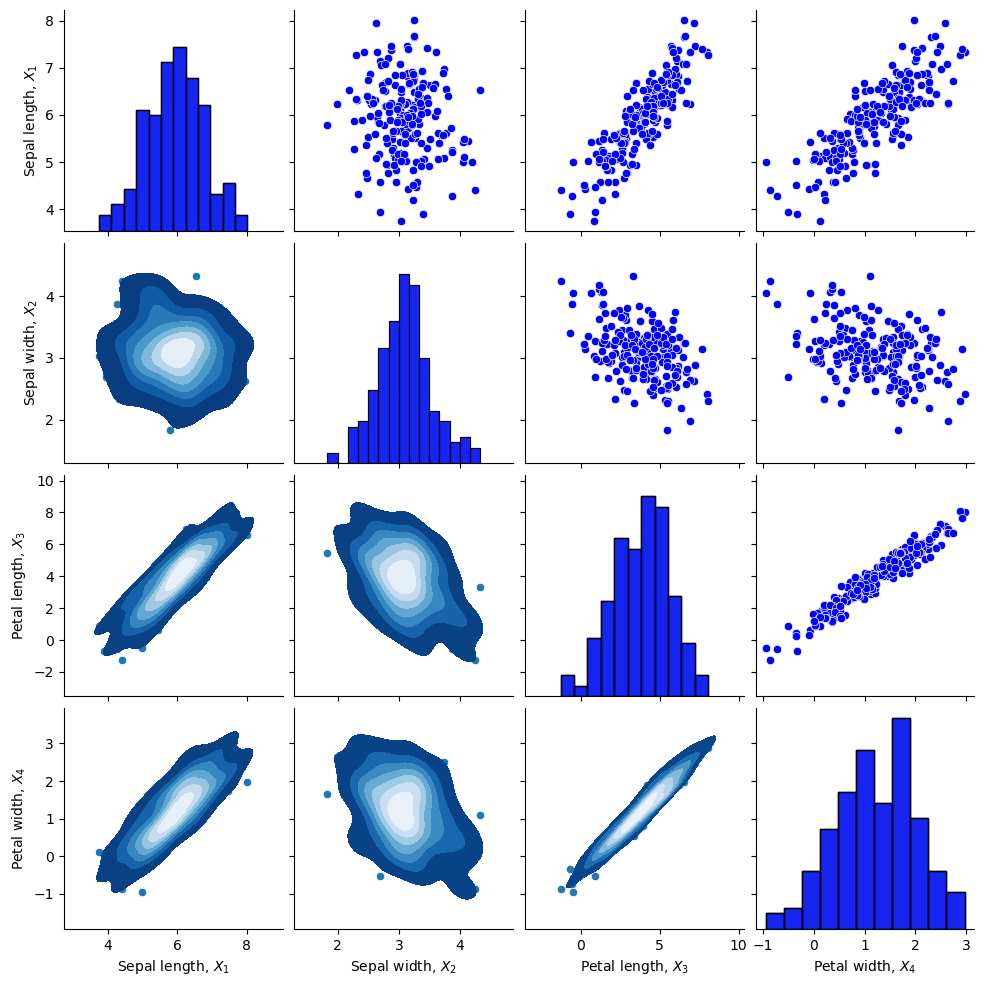

In [9]:
g = sns.pairplot(X_rand_df)  # 创建散点图矩阵
g.map_upper(sns.scatterplot, color='b')  # 在上三角绘制散点图
g.map_lower(sns.kdeplot, levels=8, fill=True, cmap="Blues_r")  # 在下三角绘制核密度估计图
g.map_diag(sns.histplot, kde=False, color='b')  # 在对角线绘制特征分布直方图